In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from reddening_laws import *
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
dist_df = pd.read_csv('final_data_files/dist_phot_alldata.csv')
# fill in with zeros to conform to fit_reddening input requirements
fill_values = pd.DataFrame(np.zeros([4,7]), columns=dist_df.columns.values)
# show columns for reference
print dist_df.columns.values

['wavelength' 'dist_ab' 'err_ab' 'dist_c' 'err_c' 'dist_mean' 'err_mean']


In [3]:
dist_full_df = pd.concat([fill_values, dist_df])
reddening_input = pd.concat([dist_full_df.dist_mean, dist_full_df.err_mean], axis=0)
dist, Av, dist_err, Av_err = fit_reddening(*reddening_input)

In [4]:
# make extinction curve
nearir_x = np.linspace(1.,1.5,50)
midir_x = np.linspace(1.5,10,100)

Rv = 3.1
Ak = ccm_nearir(2.164,Rv)

nearir_y = ccm_nearir(nearir_x,Rv) * Av + dist
midir_y = indebetouw_ir(midir_x) * Ak * Av + dist

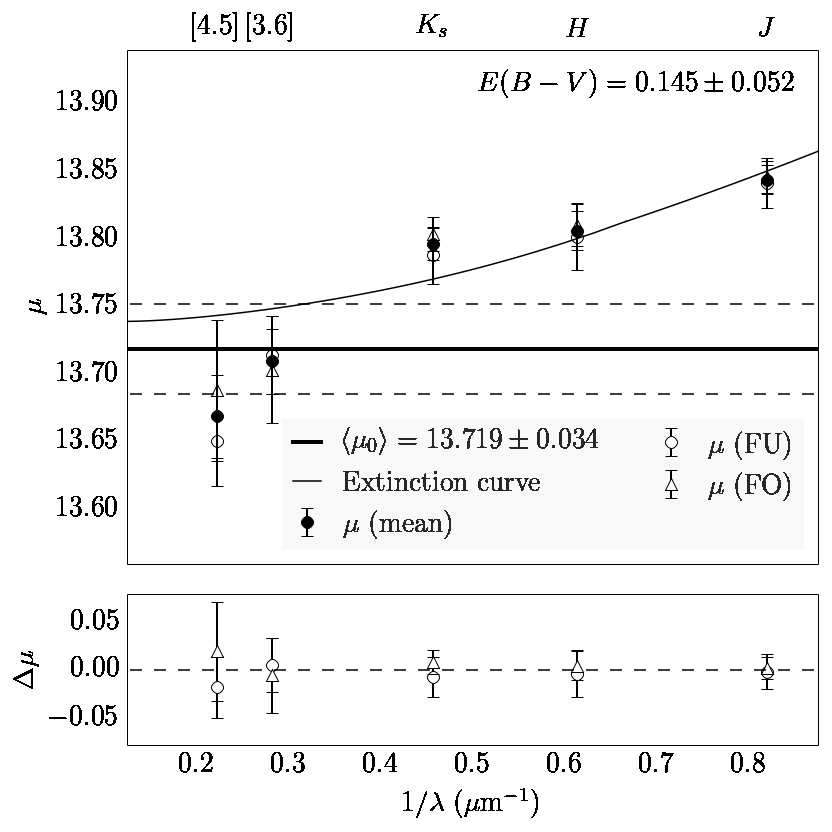

In [6]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot2grid((4,1), (3, 0))
ax = plt.subplot2grid((4,1), (0, 0), rowspan=3)
ax.set_xticks([])
#ax1.set_xticks(np.arange(0.2,0.9,0.1))
# add shadow axis object for wavelength labels
ax2 = ax.twiny()
# make line for distance modulus
x = np.linspace(0.05,0.95,10)
y = x * 0 + dist
# plot the things
ax.errorbar(1/dist_df.wavelength, dist_df.dist_mean, yerr=dist_df.err_mean,
            color='k', mfc='k', fmt='o', label=r'$\mu$ (mean)', zorder=10)
ax.errorbar(1/dist_df.wavelength, dist_df.dist_ab, yerr=dist_df.err_ab,
            color='k', mfc='w', fmt='o', label=r'$\mu$ (FU)', zorder=0)
ax.errorbar(1/dist_df.wavelength, dist_df.dist_c, yerr=dist_df.err_c,
            color='k', mfc='w', fmt='^', label=r'$\mu$ (FO)', zorder=0)
ppl.plot(ax, x, y, 'k-', lw=2, label=r'$\langle\mu_0\rangle = {:.3f}\pm{:.3f}$'.format(dist,dist_err))
ppl.plot(ax, x, y + dist_err, 'k--')
ppl.plot(ax, x, y - dist_err, 'k--')
ppl.plot(ax, 1/nearir_x, nearir_y, 'k-', label='Extinction curve')
ppl.plot(ax, 1/midir_x, midir_y, 'k-')
ppl.legend(ax, loc=4, prop={'size':14}, numpoints=1, handlelength=1, ncol=2)
ax.set_xlim(0.125,0.875)
ax1.set_xlim(0.125,0.875)
ax1.set_yticks([-0.05,0,0.05])
ax1.errorbar(1/dist_df.wavelength, dist_df.dist_ab - dist_df.dist_mean, yerr=dist_df.err_ab,
             color='k', mfc='w', fmt='o', label='FU - mean')
ax1.errorbar(1/dist_df.wavelength, dist_df.dist_c - dist_df.dist_mean, yerr=dist_df.err_c,
             color='k', mfc='w', fmt='^', label='FO - mean')
ppl.plot(ax1, x, y - dist, 'k--')
# ppl.legend(ax1, loc=4, prop={'size':14}, numpoints=1, handlelength=1.5, ncol=2)
ax2.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
ax2.xaxis.set_ticks_position('none')
# set top tick labels to bandpasses
ax2.set_xticks(1/dist_df.wavelength)
ax2.set_xticklabels(['$J$', '$H$',  '$K_s$', '[3.6]', '[4.5]'])
ax.set_ylim(13.56,13.94)
ax.text(ax.get_xlim()[1]-0.025,ax.get_ylim()[1]-0.015,
        '$E(B-V) = {:.3f} \pm {:.3f}$'.format(Av/3.1,Av_err/3.1), ha='right',va='top')
ax1.set_xlabel(r'$1/\lambda\ (\mu\mathrm{m}^{-1})$')
ax.set_ylabel(r'$\mu$')
ax1.set_ylim(-0.08,0.08)
ax1.set_ylabel(r'$\Delta\mu$')
fig.tight_layout()
#fig.savefig('final_plots/multiwavelength_distance_alldata_abc.pdf', dpi=300)